In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [2]:
env = gym.make("CartPole-v1")
state = env.reset()
state
# położenie, prędkość, kąt, prędkość kątowa

array([-0.04466579,  0.00737135, -0.03683229,  0.03981359])

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from collections  import deque
import tensorflow as tf
import random


Funkcja **Q** aproksymowana przez **sieć neuronową** - *na wejściu* sieci **tensor o kształcie (1,4)**, *na wyjściu* sieci **tensor o kształcie (1,2)** zawierający **2 wartości Q** odpowiadające **akcjom w lewo i prawo**.

In [4]:
model = Sequential()
model.add(Dense(units = 40, input_dim=4, activation='relu'))
model.add(Dense(units = 40, activation = "relu"))
model.add(Dense(units = 2, activation = "linear"))

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='MSE',optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                200       
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 2)                 82        
                                                                 
Total params: 1,922
Trainable params: 1,922
Non-trainable params: 0
_________________________________________________________________


Parametry uczenia:

In [6]:
train_episodes = 500
epsilon = 0.3
gamma = 0.99
max_steps = 200

In [7]:
epsilon = 1

Pętla treningowa:

In [8]:
memory = deque(maxlen=100)

In [9]:
batch_size = 10 

In [10]:
def train():
  state_batch, Qs_target_batch = [],[]
  minibatch = random.sample(memory, batch_size)
  for state, action, reward, next_state, done in minibatch:
    if done:
      y = reward
    else: 
      y = reward + gamma*np.max(model.predict(next_state)[0])
    Q_target = model.predict(state)
    Q_target[0][action] = y
    state_batch.append(state)
    Qs_target_batch.append(Q_target)
  state_batch = np.array(state_batch).reshape(batch_size,4)
  Qs_target_batch = np.array(Qs_target_batch).reshape(batch_size,2)
  h=model.fit(state_batch,Qs_target_batch,epochs=1,verbose=0)
  loss = h.history['loss'][0]
  return loss

In [ ]:
#TODO

In [11]:
Loss = []
Rewards = []

for e in range(1, train_episodes+1):
  epsilon = epsilon -(1/train_episodes)
  total_reward = 0
  t = 0

  state = env.reset()
  state = np.reshape(state, [1, 4])  
  
  done = False
  while t < max_steps and done == False:    
    Qs = model.predict(state)[0]
    if np.random.rand()<epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Qs)
    next_state, reward, done, _ = env.step(action)
    next_state = np.reshape(next_state, [1, 4])
    total_reward += reward

    if done:
      y = reward
    else:
      y = reward + gamma*np.max(model.predict(next_state)[0])
    Q_target = model.predict(state)
    Q_target[0][action] = y
          
  
    h = model.fit(state,Q_target,epochs=1,verbose=0)

    loss = h.history['loss'][0]

    state = next_state
    t+=1
  
  print(e," R=",total_reward," L=",loss)
  Rewards.append(total_reward)
  Loss.append(loss)

1  R= 17.0  L= 561800.25
2  R= 68.0  L= 4735366144.0
3  R= 21.0  L= 18664882176.0
4  R= 14.0  L= 6795461632.0
5  R= 14.0  L= 31075190.0
6  R= 21.0  L= 6502127104.0
7  R= 27.0  L= 13471000576.0
8  R= 15.0  L= 84587388928.0
9  R= 16.0  L= 29604143104.0
10  R= 17.0  L= 626568200192.0
11  R= 12.0  L= 1658305249280.0
12  R= 12.0  L= 439985274880.0
13  R= 13.0  L= 613006245888.0
14  R= 17.0  L= 233776693248.0
15  R= 35.0  L= 600944803840.0
16  R= 22.0  L= 344757108736.0
17  R= 12.0  L= 338496946176.0
18  R= 11.0  L= 247730339840.0
19  R= 11.0  L= 251472920576.0
20  R= 11.0  L= 175540011008.0
21  R= 19.0  L= 120591212544.0
22  R= 36.0  L= 105081765888.0
23  R= 27.0  L= 81878728704.0
24  R= 59.0  L= 170764124160.0
25  R= 20.0  L= 139828363264.0
26  R= 22.0  L= 108140519424.0
27  R= 13.0  L= 61430702080.0
28  R= 11.0  L= 79215230976.0
29  R= 14.0  L= 68402683904.0
30  R= 15.0  L= 66718085120.0
31  R= 31.0  L= 48845803520.0
32  R= 9.0  L= 75385692160.0
33  R= 11.0  L= 70546808832.0
34  R= 12.0  

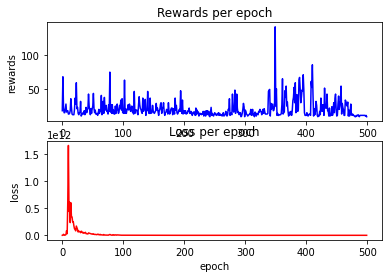

In [12]:
plt.subplot(211)
plt.ylabel('rewards')  
plt.title('Rewards per epoch')
plt.plot(range(len(Rewards)),Rewards,"b")

plt.subplot(212)
plt.xlabel('epoch')
plt.ylabel('loss')  
plt.title('Loss per epoch')
plt.plot(range(len(Loss)),Loss,"r")

plt.show()